In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from isicapi import ISICApi

from tqdm import tqdm_notebook
import os
import urllib
import locale
locale.setlocale(locale.LC_ALL, '') 

'Russian_Russia.1251'

# Подготовка данных 

In [2]:
df = pd.read_csv('img_meta.csv')

In [3]:
df.head()

,id,name,type,w,h,dataset,diagnosis,diagnosis_confirm_type,diagnosis_another,age,sex,Unnamed: 11
0,5436e3abbae478396759f0cf,ISIC_0000000,dermoscopic,1022,767,UDA-1,nevus,None,dysplastic nevus,55,female,NaN
1,5436e3acbae478396759f0d1,ISIC_0000001,dermoscopic,1022,767,UDA-1,nevus,None,dysplastic nevus,30,female,NaN
2,5436e3acbae478396759f0d3,ISIC_0000002,dermoscopic,1022,767,UDA-1,melanoma,histopathology,Melanoma in situ,60,female,NaN
3,5436e3acbae478396759f0d5,ISIC_0000003,dermoscopic,1022,767,UDA-1,nevus,None,dysplstic nevus,30,male,NaN
4,5436e3acbae478396759f0d7,ISIC_0000004,dermoscopic,1022,767,UDA-1,melanoma,histopathology,Melanoma,80,male,NaN


In [4]:
df.drop(df[df['dataset'] != 'HAM10000'].index, inplace=True)
df.reset_index(inplace=True)

In [5]:
df

,index,id,name,type,w,h,dataset,diagnosis,diagnosis_confirm_type,diagnosis_another,age,sex,Unnamed: 11
0,13830,5aaf12491165976913627e89,ISIC_0024306,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,NaN,45,male,NaN
1,13831,5aaf12491165976913627e95,ISIC_0024307,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,NaN,50,male,NaN
2,13832,5aaf12491165976913627ea0,ISIC_0024308,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,NaN,55,female,NaN
3,13833,5aaf12491165976913627eab,ISIC_0024309,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,NaN,40,male,NaN
4,13834,5aaf12491165976913627eb6,ISIC_0024310,dermoscopic,600,450,HAM10000,melanoma,histopathology,NaN,60,male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,23840,5aaf162711659769136471f0,ISIC_0034316,dermoscopic,600,450,HAM10000,melanoma,histopathology,NaN,85,male,NaN
10011,23841,5aaf162711659769136471fb,ISIC_0034317,dermoscopic,600,450,HAM10000,melanoma,histopathology,NaN,70,female,NaN
10012,23842,5aaf16271165976913647206,ISIC_0034318,dermoscopic,600,450,HAM10000,pigmented benign keratosis,histopathology,NaN,55,male,NaN
10013,23843,5aaf16271165976913647214,ISIC_0034319,dermoscopic,600,450,HAM10000,nevus,histopathology,NaN,30,male,NaN


In [6]:
df.drop(['diagnosis_another', 'Unnamed: 11', 'index'], axis=1, inplace=True)

In [7]:
df

,id,name,type,w,h,dataset,diagnosis,diagnosis_confirm_type,age,sex
0,5aaf12491165976913627e89,ISIC_0024306,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,45,male
1,5aaf12491165976913627e95,ISIC_0024307,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,50,male
2,5aaf12491165976913627ea0,ISIC_0024308,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,55,female
3,5aaf12491165976913627eab,ISIC_0024309,dermoscopic,600,450,HAM10000,nevus,serial imaging showing no change,40,male
4,5aaf12491165976913627eb6,ISIC_0024310,dermoscopic,600,450,HAM10000,melanoma,histopathology,60,male
...,...,...,...,...,...,...,...,...,...,...
10010,5aaf162711659769136471f0,ISIC_0034316,dermoscopic,600,450,HAM10000,melanoma,histopathology,85,male
10011,5aaf162711659769136471fb,ISIC_0034317,dermoscopic,600,450,HAM10000,melanoma,histopathology,70,female
10012,5aaf16271165976913647206,ISIC_0034318,dermoscopic,600,450,HAM10000,pigmented benign keratosis,histopathology,55,male
10013,5aaf16271165976913647214,ISIC_0034319,dermoscopic,600,450,HAM10000,nevus,histopathology,30,male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
id                        10015 non-null object
name                      10015 non-null object
type                      10015 non-null object
w                         10015 non-null int64
h                         10015 non-null int64
dataset                   10015 non-null object
diagnosis                 10015 non-null object
diagnosis_confirm_type    10015 non-null object
age                       9962 non-null object
sex                       10015 non-null object
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


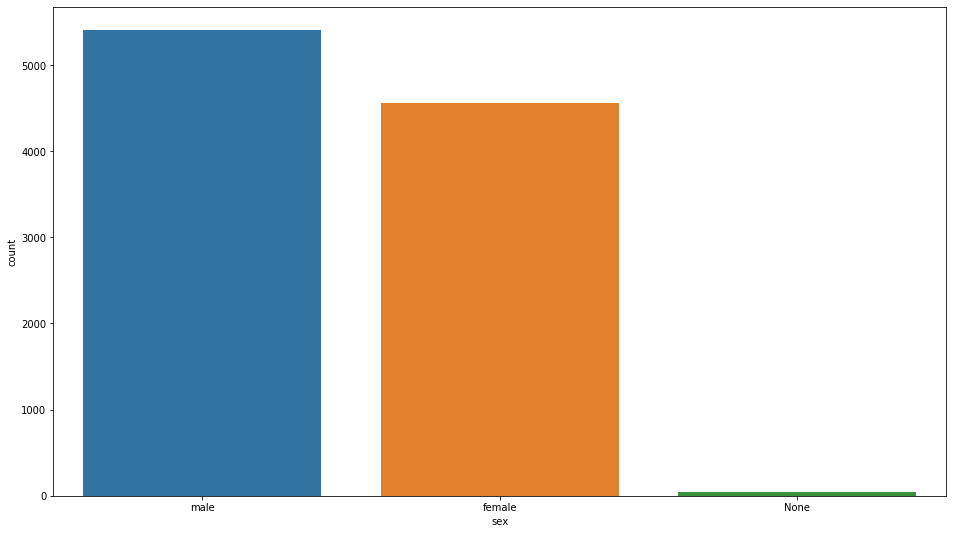

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(df['sex']);

In [10]:
diag_conf = list(df['diagnosis_confirm_type'].unique())
diag_conf

['serial imaging showing no change',
 'histopathology',
 'single image expert consensus',
 'confocal microscopy with consensus dermoscopy']

In [11]:
df['age'].fillna(0, inplace=True)

In [12]:
df['age'] = df['age'].astype(int)

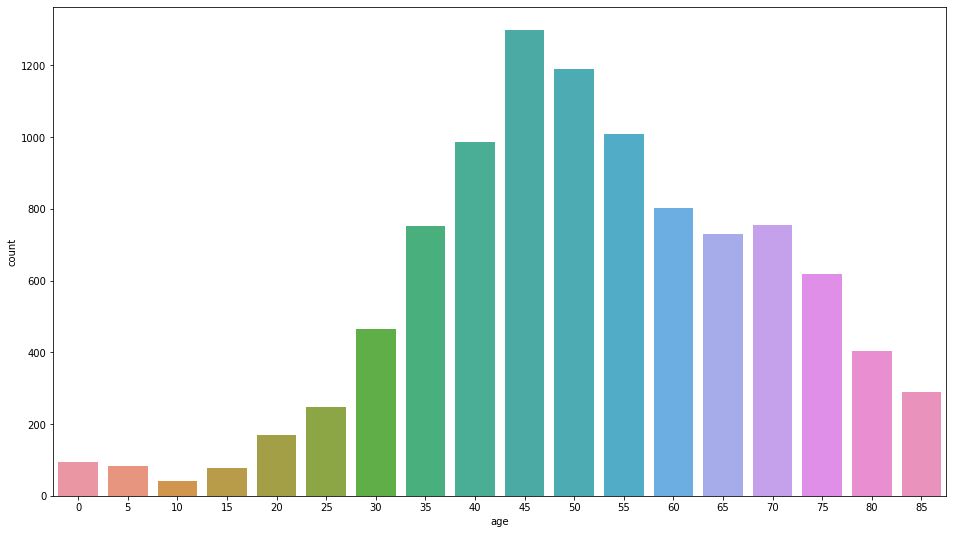

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(df['age']);

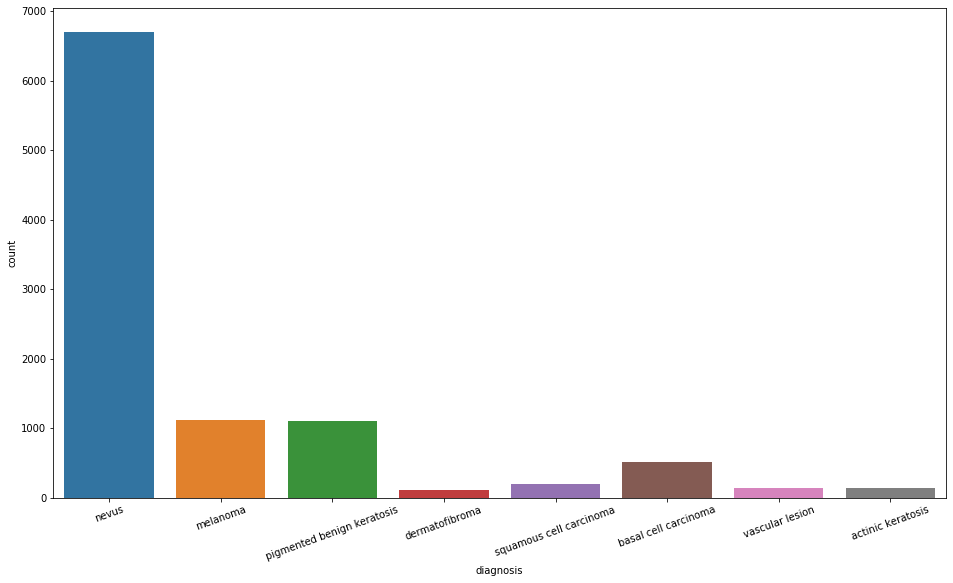

In [15]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=20)
sns.countplot(df['diagnosis']);

In [15]:
df.to_csv('training.csv')

In [17]:
img_ids = list(df['id'])
img_names = list(df['name'])
imageList = dict(zip(img_ids, img_names))

# Загрузка изображений

In [39]:
api = ISICApi(username="dmitry@gurov.co", password="Lbvfvelfr1")

In [34]:
savePath = "img/"

if not os.path.exists(savePath):
    os.makedirs(savePath)

In [ ]:
print(f"Downloading {len(imageList):n} images")
for image in tqdm_notebook(imageList):
    imageFileResp = api.get(f"image/{image}/download")
    imageFileResp.raise_for_status()
    imageFileOutputPath = os.path.join(savePath, f"{imageList[image]}.jpg")
    with open(imageFileOutputPath, 'wb') as imageFileOutputStream:
        for chunk in imageFileResp:
            imageFileOutputStream.write(chunk)
print("Done")